In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


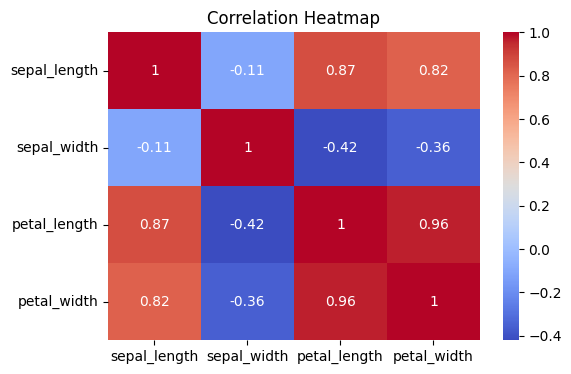

In [20]:
# Compute correlation matrix (only numeric cols)
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-2657021181.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=feature, data=df, palette="Set2")
/tmp/ipython-input-2657021181.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=feature, data=df, palette="Set2")
/tmp/ipython-input-2657021181.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=feature, data=df, palette="Set2")
/tmp/ipython-input-2657021181.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

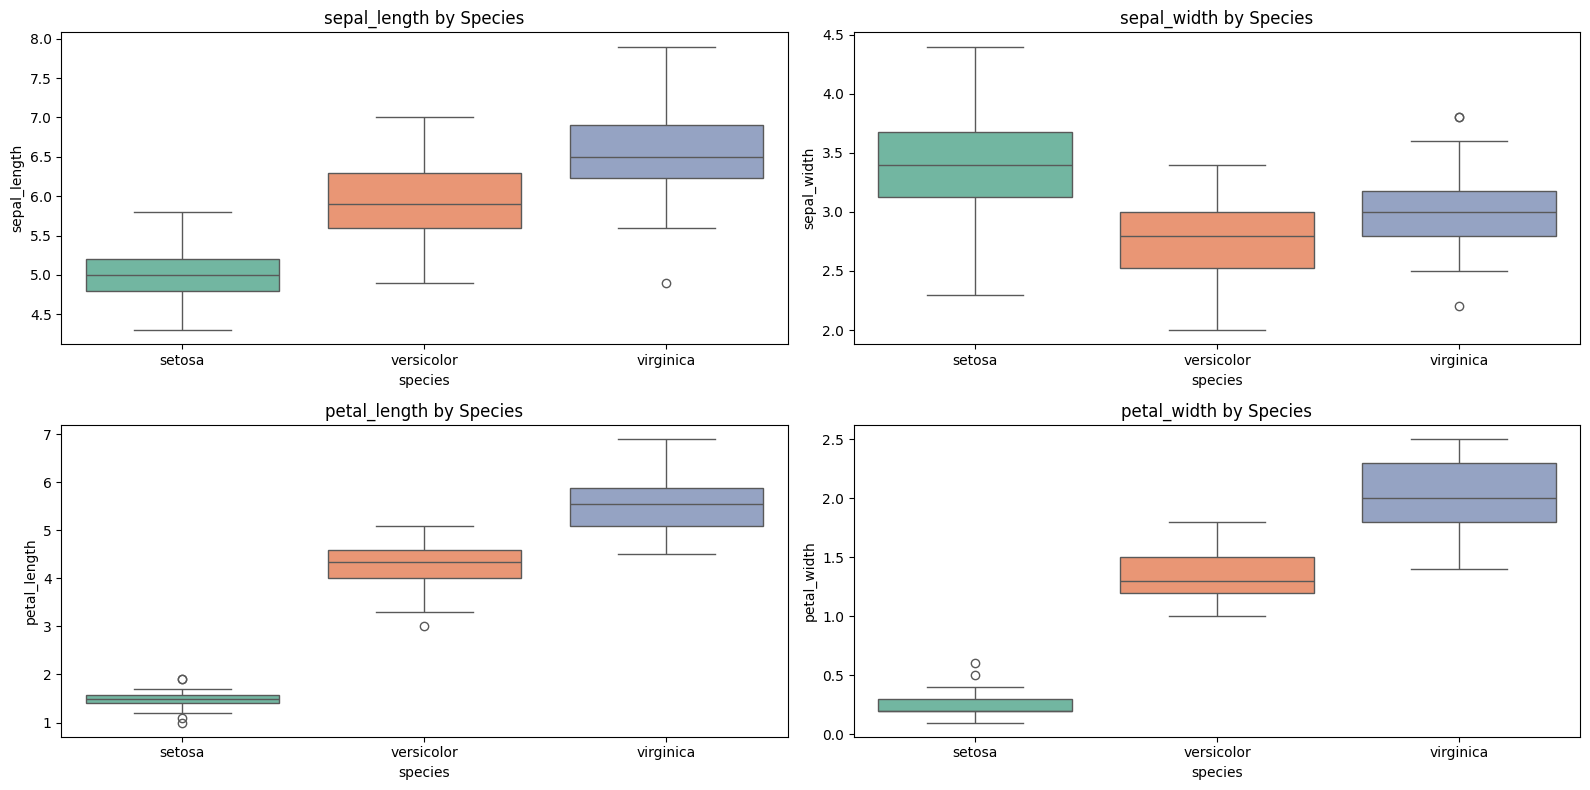

In [10]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

plt.figure(figsize=(16, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 cols
    sns.boxplot(x="species", y=feature, data=df, palette="Set2")
    plt.title(f"{feature} by Species")

plt.tight_layout()
plt.show()


Regression Coefficients:
Intercept: -7.095, Slope: 1.858
R^2 score: 0.760


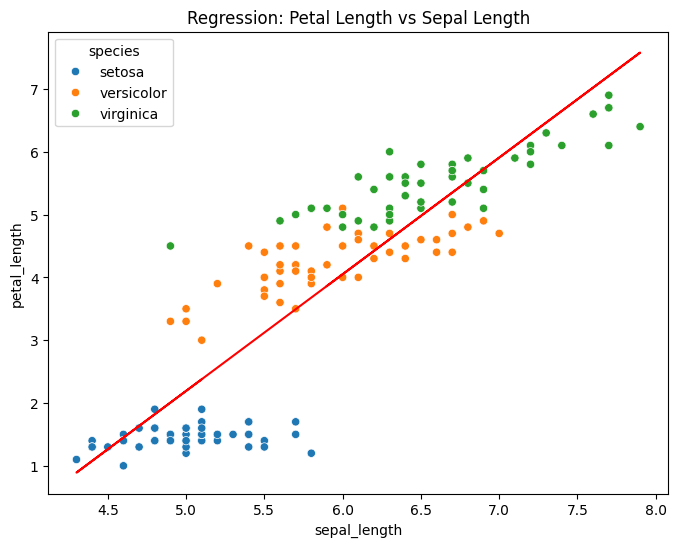

In [21]:
from sklearn.linear_model import LinearRegression

# 3. Regression Analysis - Petal length as dependent on sepal length
X = df[['sepal_length']]  # Predictor
y = df['petal_length']    # Response

model = LinearRegression()
model.fit(X, y)

print(f"\nRegression Coefficients:\nIntercept: {model.intercept_:.3f}, Slope: {model.coef_[0]:.3f}")
print(f"R^2 score: {model.score(X, y):.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(X, model.predict(X), color='red')
plt.title('Regression: Petal Length vs Sepal Length')
plt.show()

# Regression Analysis
The regression shows a strong positive relationship between sepal length and petal length, with each unit increase in sepal length adding about 1.86 units to petal length.
The negative intercept (-7.095) suggests petal length is very small or zero when sepal length is short.
An R² score of 0.76 indicates that sepal length explains about 76% of the variation in petal length.


In [29]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(df[features]))
outliers = np.where(z_scores > 2)

outlier_points = df.iloc[outliers[0]].drop_duplicates()
print("Detected Outliers:\n", outlier_points)

Detected Outliers:
      sepal_length  sepal_width  petal_length  petal_width     species
14            5.8          4.0           1.2          0.2      setosa
15            5.7          4.4           1.5          0.4      setosa
32            5.2          4.1           1.5          0.1      setosa
33            5.5          4.2           1.4          0.2      setosa
60            5.0          2.0           3.5          1.0  versicolor
105           7.6          3.0           6.6          2.1   virginica
117           7.7          3.8           6.7          2.2   virginica
118           7.7          2.6           6.9          2.3   virginica
122           7.7          2.8           6.7          2.0   virginica
131           7.9          3.8           6.4          2.0   virginica
135           7.7          3.0           6.1          2.3   virginica


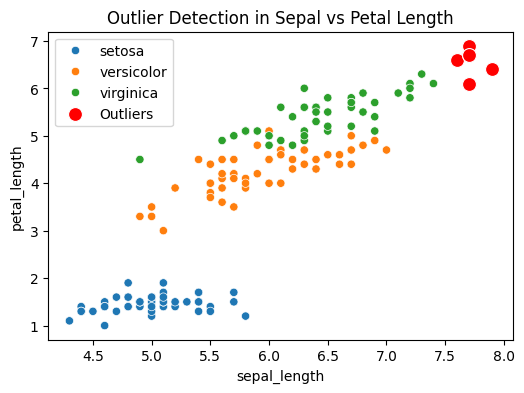

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: Z-score based outlier detection on petal_length
from scipy import stats

z_scores = np.abs(stats.zscore(df[["sepal_length", "petal_length"]]))
outliers = df[(z_scores > 2).any(axis=1)]   # keep rows with high z-scores

# Scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df)

# Highlight outliers in red
sns.scatterplot(
    x=outliers["sepal_length"],
    y=outliers["petal_length"],
    color="red", s=100, label="Outliers"
)

plt.title("Outlier Detection in Sepal vs Petal Length")
plt.legend()
plt.show()